In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv')

In [3]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

In [6]:
x = data.drop('target',axis = 1)
y = data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [7]:
print(x.shape,y.shape)

(595212, 58) (595212,)


In [8]:
gbdt = GradientBoostingClassifier(n_estimators=10)
gbdt.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
grd_enc = OneHotEncoder(categories='auto')
temp = gbdt.apply(x_train)
np.set_printoptions(threshold=np.inf)
grd_enc.fit(temp[:, :, 0])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [10]:
print(grd_enc.get_feature_names()) # 查看每一列对应的特征

['x0_3.0' 'x0_4.0' 'x0_6.0' 'x0_7.0' 'x0_10.0' 'x0_11.0' 'x0_13.0'
 'x0_14.0' 'x1_3.0' 'x1_4.0' 'x1_6.0' 'x1_7.0' 'x1_10.0' 'x1_11.0'
 'x1_13.0' 'x1_14.0' 'x2_3.0' 'x2_4.0' 'x2_6.0' 'x2_7.0' 'x2_10.0'
 'x2_11.0' 'x2_13.0' 'x2_14.0' 'x3_3.0' 'x3_4.0' 'x3_6.0' 'x3_7.0'
 'x3_10.0' 'x3_11.0' 'x3_13.0' 'x3_14.0' 'x4_3.0' 'x4_4.0' 'x4_6.0'
 'x4_7.0' 'x4_10.0' 'x4_11.0' 'x4_13.0' 'x4_14.0' 'x5_3.0' 'x5_4.0'
 'x5_6.0' 'x5_7.0' 'x5_10.0' 'x5_11.0' 'x5_13.0' 'x5_14.0' 'x6_3.0'
 'x6_4.0' 'x6_6.0' 'x6_7.0' 'x6_10.0' 'x6_11.0' 'x6_13.0' 'x6_14.0'
 'x7_3.0' 'x7_4.0' 'x7_6.0' 'x7_7.0' 'x7_10.0' 'x7_11.0' 'x7_13.0'
 'x7_14.0' 'x8_3.0' 'x8_4.0' 'x8_6.0' 'x8_7.0' 'x8_10.0' 'x8_11.0'
 'x8_13.0' 'x8_14.0' 'x9_3.0' 'x9_4.0' 'x9_6.0' 'x9_7.0' 'x9_10.0'
 'x9_11.0' 'x9_13.0' 'x9_14.0']


In [11]:
x_train_lr,x_test_lr,y_train_lr,y_test_lr = train_test_split(x,y,test_size = 0.3)
gbd_lr = LogisticRegression(solver='lbfgs',max_iter=1000)
gbd_lr.fit(grd_enc.transform(gbdt.apply(x_train_lr)[:,:,0]),y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred_gbd_lr = gbd_lr.predict_proba(grd_enc.transform(gbdt.apply(x_test)[:,:,0]))[:,1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_gbd_lr)

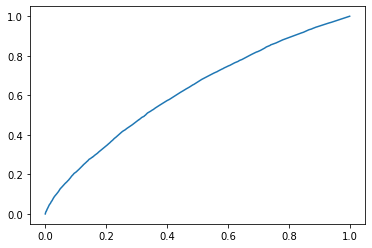

In [13]:
plt.figure(1)
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.show()

In [14]:
import lightgbm as lgb

In [15]:
lgbm = lgb.LGBMClassifier( n_estimators=10)
lgbm.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
grd_enc2 = OneHotEncoder(categories='auto')
temp2 = lgbm.predict(x_train)
np.set_printoptions(threshold=np.inf)
grd_enc2.fit(temp2[:, :, 0])

AttributeError: 'LGBMClassifier' object has no attribute 'apply'